# WEB SCRAPING 101

In this notebook we explore several important concepts and tools for web scrapping, with simple code examples: 
- In particular we leverage the ```requests``` and ```BeautifulSoup``` pacakges. 
- We introduce the JSON file format and explain what an API is. 
- We visualize results from a twitter API call, doen with ```tweepy```.
- This notebook builds upon the following: [blogpost](https://towardsdatascience.com/something-you-dont-know-about-data-file-if-you-just-a-starter-in-data-science-import-data-file-e2e007a154c4) and [blogpost](https://towardsdatascience.com/forget-apis-do-python-scraping-using-beautiful-soup-import-data-file-from-the-web-part-2-27af5d666246), with associated github code [here](https://gist.github.com/Akash-Ansari/e0d868f147c39ecf327215f06b2b27d1).

# Example with URLLIB package

In [2]:
# Import package(import the function urlretrieve from the subpackage urllib.request)
from urllib.request import urlretrieve

# Import pandas
import pandas as pd

# Assign url of file to variable url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Save file locally(we are going to use the function urlretrieve to save the file locally)
urlretrieve(url,'winequality-red.csv')

# Read file into a DataFrame and print its head
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Opening and reading flat files from the web

- You have just imported a file from the web, saved it locally and loaded it into a DataFrame. 
- If you just wanted to load a file from the web into a DataFrame without first saving it locally, 
you can do that easily using pandas. 
- In particular, you can use the function ```pd.read_csv()``` with the URL as the first argument and the separator sep as the second argument.

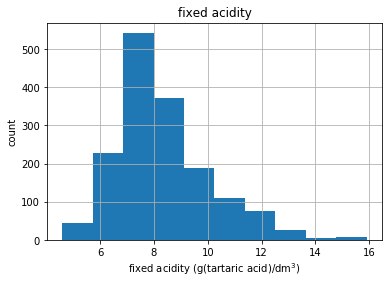

In [10]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd

# Assign url of file: url
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Read file into a DataFrame: df
df = pd.read_csv(url, sep = ';')

# Print the head of the DataFrame
# print(df.head())

# Plot first column of df
pd.DataFrame.hist(df.iloc[:, 0:1])
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()

In [11]:
df.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

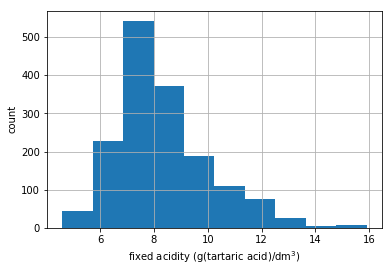

In [14]:
key_plot = df.keys()[0]
df[key_plot].hist();
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show();

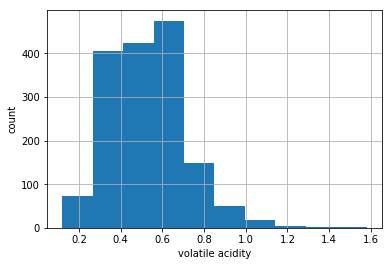

In [17]:
key_plot = df.keys()[1]
df[key_plot].hist();
plt.xlabel(key_plot)
plt.ylabel('count')
plt.show();

# Importing non-flat files from the web

- Congrats! You've just loaded a flat file from the web into a DataFrame without first saving it locally using the pandas function ```pd.read_csv()```. This function is super cool because it has close relatives that allow you to load all types of files, not only flat ones. 
- In this interactive exercise, you'll use ```pd.read_excel()``` to import an Excel spreadsheet.

In [19]:
# The URL of the spreadsheet is

# 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'
# Your job is to use pd.read_excel() to read in all of its sheets, 
# print the sheet names and then print the head of the first sheet using its name, not its index.

# Note that the output of pd.read_excel() is a Python dictionary with sheet names as keys 
# and corresponding DataFrames as corresponding values.

# Import package
# import pandas as pd

# Assign url of file: url
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'

# Read in all sheets of Excel file: xl
xl = pd.read_excel(url, sheet_name = None)

# Print the sheetnames to the shell
print(xl.keys())

# Print the head of the first sheet (using its name, NOT its index)
xl['1700'].head()

odict_keys(['1700', '1900'])


,country,1700
0,Afghanistan,34.565000
1,Akrotiri and Dhekelia,34.616667
2,Albania,41.312000
3,Algeria,36.720000
4,American Samoa,-14.307000


# Performing HTTP requests in Python using urllib 

- Now that you know the basics behind HTTP GET requests, it's time to perform some of your own. In this interactive exercise, you will ping our very own DataCamp servers to perform a GET request to extract information from our teach page, "http://www.datacamp.com/teach/documentation".
- In the next exercise, you'll extract the HTML itself. Right now, however, you are going to package and send the request and then catch the response.

In [21]:
# Import packages
from urllib.request import urlopen, Request

# Specify the url
url = "http://www.datacamp.com/teach/documentation"

# This packages the request: request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Print the datatype of response
print(type(response))

# Be polite and close the response!
response.close()

<class 'http.client.HTTPResponse'>


# Printing HTTP request results in Python using urllib

- You have just packaged and sent a GET request to "http://www.datacamp.com/teach/documentation" and then caught the response. You saw that such a response is a ```http.client.HTTPResponse``` object. The question remains: what can you do with this response?

- Well, as it came from an HTML page, you could read it to extract the HTML and, in fact, such a ```http.client.HTTPResponse``` object has an associated ```read()``` method. 

- In this exercise, you'll build on your previous great work to extract the response and print the HTML.

In [22]:
# Import packages
from urllib.request import urlopen, Request

# Specify the url
url = "http://www.datacamp.com/teach/documentation"

# This packages the request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Extract the response: html
html = response.read()

# Print the html
print(html)

# Be polite and close the response!
response.close()

b'<!doctype html>\n<html lang="en" data-direction="ltr">\n  <head>\n    <link href="https://fonts.intercomcdn.com" rel="preconnect" crossorigin>\n      <script src="https://www.googletagmanager.com/gtag/js?id=UA-39297847-9" async="async" nonce="9NGJ3DOwKgL0qvfSKA13kmtDoA1PUBwOH9xV/k1JX4k="></script>\n      <script nonce="9NGJ3DOwKgL0qvfSKA13kmtDoA1PUBwOH9xV/k1JX4k=">\n        window.dataLayer = window.dataLayer || [];\n        function gtag(){dataLayer.push(arguments);}\n        gtag(\'js\', new Date());\n        gtag(\'config\', \'UA-39297847-9\');\n</script>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <title>DataCamp Help Center</title>\n    <meta name="description" content="">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n      <meta name="intercom:trackingEvent" content="{&quot;name&quot;:&quot;Viewed Help Center&quot;,&quot;metadata&quot;:{&quot;action&quot;:&quot;viewed&quot;,&quot;object&quot;:&quot;edu

# Performing HTTP requests in Python using ```requests``` 

- Now that you've got your head and hands around making HTTP requests using the urllib package, you're going to figure out how to do the same using the higher-level ```requests``` library. 
- You'll once again be pinging DataCamp servers for their "http://www.datacamp.com/teach/documentation" page.
- Note that unlike in the previous exercises using ```urllib```, you don't have to close the connection when using ```requests```!

In [23]:
# Import package
import requests

# Specify the url: url
url = 'http://www.datacamp.com/teach/documentation'

# Packages the request, send the request and catch the response: r
r = requests.get(url)

# Print status code
print("Status code:", r.status_code)

# Extract the response: text
text = r.text

# Print the html
print(text)

Status code: 200
<!doctype html>
<html lang="en" data-direction="ltr">
  <head>
    <link href="https://fonts.intercomcdn.com" rel="preconnect" crossorigin>
      <script src="https://www.googletagmanager.com/gtag/js?id=UA-39297847-9" async="async" nonce="W0eevjS8SbnANluk6wbH/Ne1JbX/sy65VamOyeJT59E="></script>
      <script nonce="W0eevjS8SbnANluk6wbH/Ne1JbX/sy65VamOyeJT59E=">
        window.dataLayer = window.dataLayer || [];
        function gtag(){dataLayer.push(arguments);}
        gtag('js', new Date());
        gtag('config', 'UA-39297847-9');
</script>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <title>DataCamp Help Center</title>
    <meta name="description" content="">
    <meta name="viewport" content="width=device-width, initial-scale=1">
      <meta name="intercom:trackingEvent" content="{&quot;name&quot;:&quot;Viewed Help Center&quot;,&quot;metadata&quot;:{&quot;action&quot;:&quot;viewed&quot;,&quot;object&quot;:&quot;educate_ho

# Parsing HTML with ```BeautifulSoup```

- In this interactive exercise, you'll learn how to use the BeautifulSoup package to parse, prettify and extract information from HTML. 
- You'll scrape the data from the webpage of Guido van Rossum, Python's very own Benevolent Dictator for Life. In the following exercises, you'll prettify the HTML and then extract the text and the hyperlinks.
- The URL of interest is url = 'https://www.python.org/~guido/'.

In [25]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc, "lxml")

# Prettify the BeautifulSoup object: pretty_soup
pretty_soup = soup.prettify()

# Print the response
print(pretty_soup)

<html>
 <head>
  <title>
   Guido's Personal Home Page
  </title>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <h1>
   <a href="pics.html">
    <img border="0" src="images/IMG_2192.jpg"/>
   </a>
   Guido van Rossum - Personal Home Page
  </h1>
  <p>
   <a href="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm">
    <i>
     "Gawky and proud of it."
    </i>
   </a>
  </p>
  <h3>
   <a href="http://metalab.unc.edu/Dave/Dr-Fun/df200004/df20000406.jpg">
    Who
I Am
   </a>
  </h3>
  <p>
   Read
my
   <a href="http://neopythonic.blogspot.com/2016/04/kings-day-speech.html">
    "King's
Day Speech"
   </a>
   for some inspiration.
  </p>
  <p>
   I am the author of the
   <a href="http://www.python.org">
    Python
   </a>
   programming language.  See also my
   <a href="Resume.html">
    resume
   </a>
   and my
   <a href="Publications.html">
    publications list
   </a>
   , a
   <a href="bio.html">
    brief bio
   </a>
   , assor

In [36]:
# Make an empty list to store data
children = []

# Start a loop to go through all the children tags in soup
for tag in soup.findChildren():
    
    # If the name of the tag (tag.name) is not already in the children list
    if tag.name not in children:
        
        # Add the name of the tag to the children list
        children.append(tag.name)

# Look at the list members
children

['html',
 'head',
 'title',
 'body',
 'h1',
 'a',
 'img',
 'p',
 'i',
 'h3',
 'b',
 'ul',
 'li',
 'hr']

# Turning a webpage into data using ```BeautifulSoup```: getting the text

- As promised, in the following exercises, you'll learn the basics of extracting information from HTML soup. 
- In this exercise, you'll figure out how to extract the text from the BDFL's webpage, along with printing the webpage's title.

In [27]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url: url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc, "lxml")

# Get the title of Guido's webpage: guido_title
guido_title = soup.title

# Print the title of Guido's webpage to the shell
print(guido_title)

# Get Guido's text: guido_text
guido_text = soup.get_text()

# Print Guido's text to the shell
print(guido_text)

<title>Guido's Personal Home Page</title>


Guido's Personal Home Page




Guido van Rossum - Personal Home Page
"Gawky and proud of it."
Who
I Am
Read
my "King's
Day Speech" for some inspiration.

I am the author of the Python
programming language.  See also my resume
and my publications list, a brief bio, assorted writings, presentations and interviews (all about Python), some
pictures of me,
my new blog, and
my old
blog on Artima.com.  I am
@gvanrossum on Twitter.

In January 2013 I joined
Dropbox.  I work on various Dropbox
products and have 50% for my Python work, no strings attached.
Previously, I have worked for Google, Elemental Security, Zope
Corporation, BeOpen.com, CNRI, CWI, and SARA.  (See
my resume.)  I created Python while at CWI.

How to Reach Me
You can send email for me to guido (at) python.org.
I read everything sent there, but if you ask
me a question about using Python, it's likely that I won't have time
to answer it, and will instead refer you to
help (at) python.

# Turning a webpage into data using ```BeautifulSoup```: getting the hyperlinks
- In this exercise, you'll figure out how to extract the URLs of the hyperlinks from the BDFL's webpage. 
- In the process, you'll become close friends with the soup method ```find_all()```.

In [29]:
# Import packages
import requests
from bs4 import BeautifulSoup

# Specify url
url = 'https://www.python.org/~guido/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extracts the response as html: html_doc
html_doc = r.text

# create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc, "lxml")

# Print the title of Guido's webpage
# print(soup.title)

# Find all 'a' tags (which define hyperlinks): a_tags
a_tags = soup.find_all('a')

# Print the URLs to the shell
for link in a_tags:
    print(link.get('href'))

pics.html
http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm
http://metalab.unc.edu/Dave/Dr-Fun/df200004/df20000406.jpg
http://neopythonic.blogspot.com/2016/04/kings-day-speech.html
http://www.python.org
Resume.html
Publications.html
bio.html
http://legacy.python.org/doc/essays/
http://legacy.python.org/doc/essays/ppt/
interviews.html
pics.html
http://neopythonic.blogspot.com
http://www.artima.com/weblogs/index.jsp?blogger=12088
https://twitter.com/gvanrossum
http://www.dropbox.com
Resume.html
http://groups.google.com/groups?q=comp.lang.python
http://stackoverflow.com
guido.au
http://legacy.python.org/doc/essays/
images/license.jpg
http://www.cnpbagwell.com/audio-faq
http://sox.sourceforge.net/
images/internetdog.gif


# What exactly is JSON?

- JSONs consist of key-value pairs.
- JSONs are human-readable.
- The JSON file format arose out of a growing need for real-time server-to-browser communication.
- The function ```json.load()``` will load the JSON into Python as a dictionary.

- __HTML__ in the wild can be incredibly complicated and __XML__ is verbose and has other ideosyncracies. 
- __JavaScript Object Notation (JSON)__ is probably the most popular data markup language and is especially ubiquitous when retreiving data from the application programming interfaces (APIs) of popular platforms like Twitter, Reddit, Wikipedia, etc.
- __JSON__ is attractive for programmers using JavaScript and Python because it can represent a mix of different data types.

# Exploring a JSON 
- Now that you know what a JSON is, you'll load one into your Python environment and explore it yourself. 
- Loading a JSON into the variable json_data, which will be a dictionary. 
- You'll then explore the JSON contents by printing the key-value pairs of json_data.

- Below is an example of a [tweet status object](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object) that Twitter's API returns. 
- This ```obama_tweet``` dictionary corresponds to [this tweet](https://twitter.com/BarackObama/status/831527113211645959).
- This is a classic example of a JSON object containing a mixture of dictionaries, lists, lists of dictionaries, dictionaries of lists, etc.

In [37]:
obama_tweet = {'created_at': 'Tue Feb 14 15:34:47 +0000 2017',
               'favorite_count': 1023379,
               'hashtags': [],
               'id': 831527113211645959,
               'id_str': '831527113211645959',
               'lang': 'en',
               'media': [{'display_url': 'pic.twitter.com/O0UhJWoqGN',
                          'expanded_url': 'https://twitter.com/BarackObama/status/831527113211645959/photo/1',
                          'id': 831526916398149634,
                          'media_url': 'http://pbs.twimg.com/media/C4otUykWcAIbSy1.jpg',
                          'media_url_https': 'https://pbs.twimg.com/media/C4otUykWcAIbSy1.jpg',
                          'sizes': {'large': {'h': 800, 'resize': 'fit', 'w': 1200},
                                    'medium': {'h': 800, 'resize': 'fit', 'w': 1200},
                                    'small': {'h': 453, 'resize': 'fit', 'w': 680},
                                    'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
                          'type': 'photo',
                          'url': 'https://t.co/O0UhJWoqGN'}],
               'retweet_count': 252266,
               'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
               'text': 'Happy Valentine’s Day, @michelleobama! Almost 28 years with you, but it always feels new. https://t.co/O0UhJWoqGN',
               'urls': [],
               'user': {'created_at': 'Mon Mar 05 22:08:25 +0000 2007',
                        'description': 'Dad, husband, President, citizen.',
                        'favourites_count': 10,
                        'followers_count': 84814791,
                        'following': True,
                        'friends_count': 631357,
                        'id': 813286,
                        'lang': 'en',
                        'listed_count': 221906,
                        'location': 'Washington, DC',
                        'name': 'Barack Obama',
                        'profile_background_color': '77B0DC',
                        'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/451819093436268544/kLbRvwBg.png',
                        'profile_banner_url': 'https://pbs.twimg.com/profile_banners/813286/1484945688',
                        'profile_image_url': 'http://pbs.twimg.com/profile_images/822547732376207360/5g0FC8XX_normal.jpg',
                        'profile_link_color': '2574AD',
                        'profile_sidebar_fill_color': 'C2E0F6',
                        'profile_text_color': '333333',
                        'screen_name': 'BarackObama',
                        'statuses_count': 15436,
                        'time_zone': 'Eastern Time (US & Canada)',
                        'url': 'https://t.co/93Y27HEnnX',
                        'utc_offset': -18000,
                        'verified': True},
               'user_mentions': [{'id': 409486555,
                                  'name': 'Michelle Obama',
                                  'screen_name': 'MichelleObama'}]}

In [39]:
# What are the top-most keys in the obama_tweet object?
obama_tweet.keys()

dict_keys(['text', 'created_at', 'user_mentions', 'urls', 'source', 'media', 'id_str', 'id', 'retweet_count', 'hashtags', 'lang', 'favorite_count', 'user'])

In [40]:
# When was this tweet sent?
obama_tweet['created_at']

'Tue Feb 14 15:34:47 +0000 2017'

In [41]:
# How many followers does the "user" who wrote this tweet have?
obama_followers = obama_tweet['user']['followers_count']/(10**6)
print('Number of Obama followers: {:.2f} Million'.format(obama_followers))

Number of Obama followers: 84.81 Million


In [42]:
# What's the text of this tweet?
obama_tweet['text']

'Happy Valentine’s Day, @michelleobama! Almost 28 years with you, but it always feels new. https://t.co/O0UhJWoqGN'

In [49]:
# IMPORTS
import requests
from operator import itemgetter
import argparse


# FUNCTION TO MAKE API CALL AND PRINT RESULT OF CALL
def hacker_call(entries):
    # Make an API call and store the response.
    url = 'https://hacker-news.firebaseio.com/v0/topstories.json'
    r = requests.get(url)
    print("Status code:", r.status_code)

    # Process information about each submission.
    submission_ids = r.json()
    submission_dicts = []
    for submission_id in submission_ids[:entries]:
        # Make a separate API call for each submission.
        url = ('https://hacker-news.firebaseio.com/v0/item/' +
               str(submission_id) + '.json')
        submission_r = requests.get(url)
        # print(submission_r.status_code)
        response_dict = submission_r.json()

        submission_dict = {
            'title': response_dict['title'],
            'link': 'http://news.ycombinator.com/item?id=' + str(submission_id),
            'comments': response_dict.get('descendants', 0)
        }
        submission_dicts.append(submission_dict)

    submission_dicts = sorted(submission_dicts,
                              key=itemgetter('comments'),
                              reverse=True)

    count = 1
    for submission_dict in submission_dicts:
        # print("\nTitle ", str(count), ":", submission_dict['title'])
        str_count = str(count)+":"
        print("\nTitle ", str_count, submission_dict['title'])
        print("Discussion link:", submission_dict['link'])
        print("Comments:", submission_dict['comments'])
        count += 1



hacker_call(5)

Status code: 200

Title  1: California Dispatches Goats to Eat Brush, Prevent Wildfires
Discussion link: http://news.ycombinator.com/item?id=19827142
Comments: 48

Title  2: What Is Going on with UFOs and the Department of Defense?
Discussion link: http://news.ycombinator.com/item?id=19828448
Comments: 35

Title  3: Show HN: ZFS Implementation in Python
Discussion link: http://news.ycombinator.com/item?id=19827336
Comments: 31

Title  4: What if we hired for skills, not degrees?
Discussion link: http://news.ycombinator.com/item?id=19828512
Comments: 28

Title  5: Moms Who Were Extremely Online in 1993
Discussion link: http://news.ycombinator.com/item?id=19822123
Comments: 0


# What's an API?

- An API is a set of protocols and routines for building and interacting with software applications.
- API is an acronym and is short for Application Program interface.
- It is common to pull data from APIs in the JSON file format.
- An API is a bunch of code that allows two software programs to communicate with each other.

# API requests 

- Now it's your turn to pull some movie data down from the Open Movie Database (OMDB) using their API. 
- Note: recently, OMDB has changed their API: you now also have to specify an API key. 
- This means you'll have to get your key and add another argument to the URL.

## OMDB API

In [61]:
# Import requests package
import requests

# Assign URL to variable: url
your_key = "YOUR KEY"
url = 'http://www.omdbapi.com/?t=social+network&apikey='+your_key

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Print the text of the response
print(r.text)

{"Title":"The Social Network","Year":"2010","Rated":"PG-13","Released":"01 Oct 2010","Runtime":"120 min","Genre":"Biography, Drama","Director":"David Fincher","Writer":"Aaron Sorkin (screenplay), Ben Mezrich (book)","Actors":"Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons","Plot":"Harvard student Mark Zuckerberg creates the social networking site. That would become known as Facebook but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.","Language":"English, French","Country":"USA","Awards":"Won 3 Oscars. Another 165 wins & 168 nominations.","Poster":"https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"7.7/10"},{"Source":"Rotten Tomatoes","Value":"95%"},{"Source":"Metacritic","Value":"95/100"}],"Metascore":"95","imdbRating":"7.7","imdbVotes":"564,327","imdbID":"tt

In [62]:
# store API response in a variable
response_dict = r.json()

# process results: keys of response
print(response_dict.keys())

dict_keys(['Actors', 'Poster', 'Language', 'Writer', 'Website', 'Country', 'Runtime', 'imdbID', 'Genre', 'Ratings', 'Year', 'Type', 'Title', 'Response', 'Production', 'Released', 'Director', 'imdbRating', 'Awards', 'Plot', 'BoxOffice', 'Metascore', 'imdbVotes', 'DVD', 'Rated'])


In [63]:
# what is the plot of the movie?
response_dict['Plot']

'Harvard student Mark Zuckerberg creates the social networking site. That would become known as Facebook but is later sued by two brothers who claimed he stole their idea, and the co-founder who was later squeezed out of the business.'

In [64]:
# Print each key-value pair in json_data
for k in response_dict.keys():
    print(k + ': ', response_dict[k])

Actors:  Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons
Poster:  https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Language:  English, French
Writer:  Aaron Sorkin (screenplay), Ben Mezrich (book)
Website:  http://www.thesocialnetwork-movie.com/
Country:  USA
Runtime:  120 min
imdbID:  tt1285016
Genre:  Biography, Drama
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '95%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Year:  2010
Type:  movie
Title:  The Social Network
Response:  True
Production:  Columbia Pictures
Released:  01 Oct 2010
Director:  David Fincher
imdbRating:  7.7
Awards:  Won 3 Oscars. Another 165 wins & 168 nominations.
Plot:  Harvard student Mark Zuckerberg creates the social networking site. That would become known as Facebook but is later sued by two brothers who claimed he stole their idea, and the co-founder w

## GITHUB API

- Next, pull data from github API. 
- Visualize the most starred repositories associated with the python language. 

In [74]:
# make an API call and store the response
url = "https://api.github.com/search/repositories?q=language:python&sort=stars"
r = requests.get(url)

print("Status code:", r.status_code)
print("A status code of 200 indicates a successful response.")

# store API response in a variable
response_dict = r.json()

# process results: keys of response
# print(response_dict.keys())

# explore information about the repositories
print("Total repositories:", response_dict['total_count'])
repo_dicts = response_dict['items']
print("Repositories returned:", len(repo_dicts))

# Selected information about each repository
print("\nSelected information about each repository:")
for repo_dict in repo_dicts:
    print('\nName:', repo_dict['name'])
    print('Owner:', repo_dict['owner']['login'])
    print('Stars:', repo_dict['stargazers_count'])
    print('Repository:', repo_dict['html_url'])
    print('Description:', repo_dict['description'])

# explore and visualize information about repositories
names, stars = [], []
plot_dicts = []
for repo_dict in repo_dicts:
    names.append(repo_dict['name'])
    stars.append(repo_dict['stargazers_count'])
    plot_dict = {
        'value': repo_dict['stargazers_count'],
        'label': repo_dict['description'],
        'xlink': repo_dict['html_url'],
        }
    plot_dicts.append(plot_dict)

Status code: 200
A status code of 200 indicates a successful response.
Total repositories: 3668272
Repositories returned: 30

Selected information about each repository:

Name: awesome-python
Owner: vinta
Stars: 66783
Repository: https://github.com/vinta/awesome-python
Description: A curated list of awesome Python frameworks, libraries, software and resources

Name: system-design-primer
Owner: donnemartin
Stars: 62473
Repository: https://github.com/donnemartin/system-design-primer
Description: Learn how to design large-scale systems. Prep for the system design interview.  Includes Anki flashcards.

Name: public-apis
Owner: toddmotto
Stars: 56435
Repository: https://github.com/toddmotto/public-apis
Description: A collective list of free APIs for use in software and web development.

Name: models
Owner: tensorflow
Stars: 52186
Repository: https://github.com/tensorflow/models
Description: Models and examples built with TensorFlow

Name: youtube-dl
Owner: ytdl-org
Stars: 49989
Repository: 

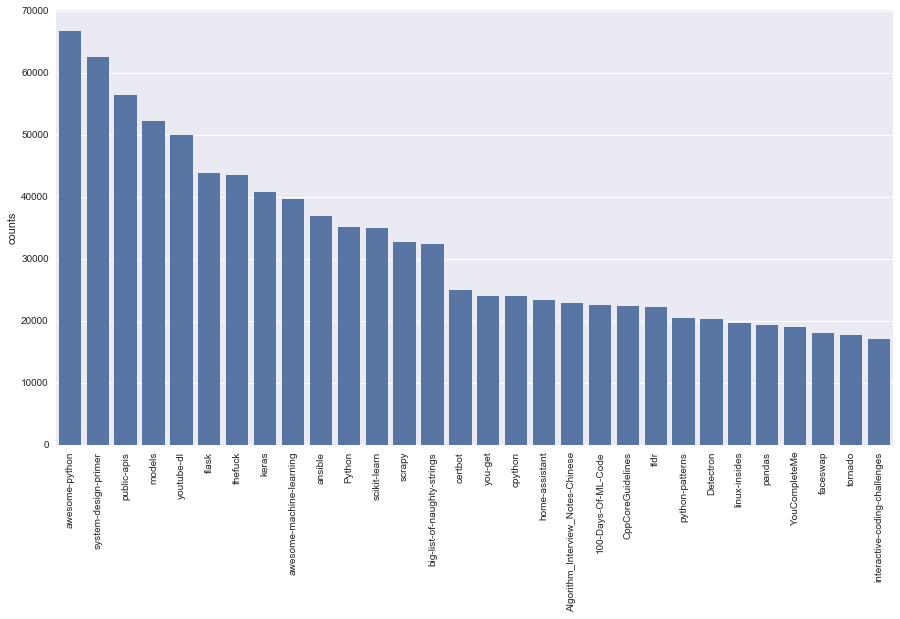

In [86]:
# Import packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Set seaborn style
# sns.set(color_codes=False)
base_color = sns.color_palette()[0]

# Plot histogram
plt.figure(figsize=(15,8));
ax = sns.barplot(names, stars, color=base_color)
ax.set(ylabel="counts")
plt.xticks(rotation=90);
plt.show()

## WIKIPEDIA API

- You're doing so well and having so much fun that we're going to throw one more API at you: the Wikipedia API (documented here: https://www.mediawiki.org/wiki/API:Main_page). You'll figure out how to find and extract information from the Wikipedia page for Pizza. 
- What gets a bit wild here is that your query will return nested JSONs, that is, JSONs with JSONs, but Python can handle that because it will translate them into dictionaries within dictionaries.
- The URL that requests the relevant query from the Wikipedia API is https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza

In [76]:
# Assign URL to variable: url
url = 'https://en.wikipedia.org/w/api.php?action=query&prop=extracts&format=json&exintro=&titles=pizza'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data = r.json()

# Print the Wikipedia page extract
pizza_extract = json_data['query']['pages']['24768']['extract']
print(pizza_extract)

<p class="mw-empty-elt">
</p>

<p><b>Pizza</b> (<small>Italian: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsa]</span>, <small>Neapolitan: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsə]</span>) is a savory dish of Italian origin, consisting of a usually round, flattened base of leavened wheat-based dough topped with tomatoes, cheese, and various other ingredients (anchovies, olives, meat, etc.) baked at a high temperature, traditionally in a  wood-fired oven. In formal settings, like a restaurant, pizza is  eaten with knife and fork, but in casual settings it is cut into wedges to be eaten while held in the hand. Small pizzas are sometimes called pizzettas.
</p><p>The term <i>pizza</i> was first recorded in the 10th century in a Latin manuscript from the Southern Italian town of Gaeta in Lazio, on the border with Campania. Modern pizza was invented in Naples, and the dish and its variants have sinc

# API Authentication

- The package ```tweepy``` is great at handling all the Twitter API OAuth Authentication details for you. All you need to do is pass it your authentication credentials. 
- Your task is to pass these credentials to tweepy's OAuth handler.
- The baseline of each application we’ll build today requires using ```tweepy``` to create an API object which we can call functions with. 
- In order create the API object, however, we must first authenticate ourselves with our developer information.
- __Twitter Developer Account__: In order to use Twitter’s API, we have to create a developer account on the Twitter apps site. Log in or make a Twitter account at https://apps.twitter.com/. Create a new app (button on the top right).

In [88]:
# Import package
import tweepy

# authenticate
consumer_key = 'YOUR-CONSUMER-KEY'
consumer_secret = 'YOUR-CONSUMER-SECRET'
access_token = 'YOUR-ACCESS-TOKEN'
access_secret = 'YOUR-ACCESS-SECRET'

Creation of API object: This will be the basis of every application we build, so make sure you don’t delete it.

In [89]:
# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth) 

## TWITTER SEARCH 

In [173]:
# The search term you want to find
query = "obama"
# Language code (follows ISO 639-1 standards)
language = "en"
# desired number of results
number_results = 5

# Calling the user_timeline function with our parameters
results = api.search(q=query, lang=language, result_type='popular', count=number_results)

# for each tweet print user name and tweet text
for tweet in results:
    # printing the text stored inside the tweet object
    print(tweet.user.screen_name,"Tweeted:\n", tweet.text)
    print('-------------------------------------------')

DonaldJTrumpJr Tweeted:
 -Unemployment rate at lowest point since 1969

-Record low African American/Hispanic/Asian unemployment

-Lowest un… https://t.co/HHgyrp4ynt
-------------------------------------------
MariaBartiromo Tweeted:
 NYT Confirms Obama Admin Used Multiple Spies Against Trump In 2016 BOOM   ⁦@SundayFutures⁩ ⁦@FoxNews⁩ ⁦… https://t.co/PtDvLW20B9
-------------------------------------------
LindseyGrahamSC Tweeted:
 When it comes to counterintelligence investigation of the Trump campaign:  What did President Obama, Susan Rice, et… https://t.co/hJvZsFoGxP
-------------------------------------------
dbongino Tweeted:
 Dear America,
I sincerely hope &amp; pray, for the sake of our Republic, that no politician, law enforcement official,… https://t.co/4TODnjiLUl
-------------------------------------------
dbongino Tweeted:
 Dear Democrats,
I thought the complete humiliation you suffered, after your absurd collusion hoax was debunked, was… https://t.co/SbCBb1vvE3
--------------

## Streaming tweets 
- Now that you have set up your authentication credentials, it is time to stream some tweets. 
- For detials, check out: https://marcobonzanini.com/2015/03/02/mining-twitter-data-with-python-part-1/
- For detials, check out: http://adilmoujahid.com/posts/2014/07/twitter-analytics/

In [205]:
# Your task is to create the Streamobject and to filter tweets according to particular keywords.

# Define a Tweet listener that creates a file called 'tweets.txt', 
# collects streaming tweets as .jsons and writes them to the file 'tweet_stream.txt'; 
# once 100 tweets have been streamed, the listener closes the file and stops listening.
class MyStreamListener(tweepy.StreamListener):
    def __init__(self, number_max, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.number_max = number_max
        self.file = open("tweets_stream.txt", "w")

    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        if self.num_tweets < self.number_max:
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)
        return True


# Initialize Stream listener
number_max = 300
l = MyStreamListener(number_max)

# Create your Stream object with authentication
stream = tweepy.Stream(auth, l)

# Filter Twitter Streams to capture data by the keywords:
stream.filter(track = ['clinton', 'trump', 'obama'])

# Load and explore your Twitter data 

- Now that you've got your Twitter data sitting locally in a text file, it's time to explore it! 
- This is what you'll do in the next few interactive exercises. In this exercise, you'll read the Twitter data into a list: tweets_data.

In [206]:
# Import package
import json

# String of path to file: tweets_data_path
tweets_data_path = 'tweets_stream.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())

dict_keys(['truncated', 'quoted_status', 'in_reply_to_user_id_str', 'contributors', 'source', 'created_at', 'text', 'geo', 'quoted_status_id_str', 'in_reply_to_status_id_str', 'coordinates', 'quoted_status_permalink', 'favorite_count', 'retweeted', 'quoted_status_id', 'in_reply_to_status_id', 'timestamp_ms', 'id', 'retweeted_status', 'place', 'favorited', 'reply_count', 'id_str', 'filter_level', 'entities', 'in_reply_to_user_id', 'is_quote_status', 'retweet_count', 'user', 'lang', 'in_reply_to_screen_name', 'quote_count'])


# Twitter data to DataFrame 

- Now you have the Twitter data in a list of dictionaries, tweets_data, where each dictionary corresponds to a single tweet. 
- Next, you're going to extract the text and language of each tweet. The text in a tweet, t1, is stored as the value t1['text']; similarly, the language is stored in t1['lang']. Your task is to build a DataFrame in which each row is a tweet and the columns are 'text' and 'lang'.

In [207]:
# Import package
import pandas as pd

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text','lang'])

# Print head of DataFrame
print(df.head())

                                                text lang
0  RT @ooshdesign: As that was not enough, not on...   en
1  @charliekirk11 And if a Dem did one of a thous...   en
2  RT @GregRubini: 24. about Lisa Page:\nThings a...   en
3  RT @AshaRangappa_: People seemed to miss the p...   en
4  RT @TheSWPrincess: NEVER bashed them publicly ...   en


In [208]:
# languages present in data
df['lang'].unique()

array(['en', 'pt', 'es', 'ja', 'und'], dtype=object)

# Twitter Text Analysis 

- Now that you have your DataFrame of tweets set up, you're going to do a bit of text analysis to count how many tweets contain the words 'clinton', 'trump', 'sanders' and 'cruz'. 
- We have defined the following function ```word_in_text()```, which will tell you whether the first argument (a word) occurs within the 2nd argument (a tweet).

In [210]:
import re

def word_in_text(word, tweet):
    word = word.lower()
    text = tweet.lower()
    match = re.search(word, tweet)

    if match:
        return True
    return False


# You're going to iterate over the rows of the DataFrame 
# and calculate how many tweets contain each of our keywords! 
# The list of objects for each candidate has been initialized to 0.

# Initialize list to store tweet counts
[clinton, trump, obama] = [0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    obama += word_in_text('obama', row['text'])

# Plotting your Twitter data

- Now that you have the number of tweets that each candidate was mentioned in, you can plot a bar chart of this data. 

- You'll use the statistical data visualization library ```seaborn```; you pass two arguments: a list of labels and a list containing the variables you wish to plot (clinton, trump and so on.)

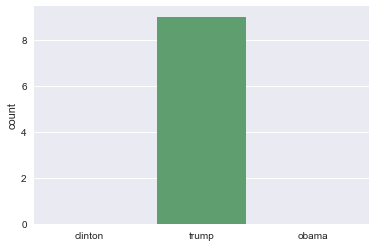

In [212]:
# Import packages
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['clinton', 'trump', 'obama']

# Plot histogram
ax = sns.barplot(cd, [clinton, trump, obama])
ax.set(ylabel="count")
plt.show()